In [ ]:
'''
선형 회귀는 데이터의 경향성을 가장 잘 설명하는 하나의 직선을 예측하는 것입니다. 선형 회귀를 이용하면 데이터에 대한 경향성을
예측할 수 있습니다. 

데이터의 경향성을 가장 잘 설명하는 하나의 직선과 각 데이터의 차이를 잔차라고 합니다 잔차의 제곱을 최소화하는 알고리즘을
최소제곱법이라고 합니다. 
최소제곱법으로 y=ax+b의 a,b를 구할 수 있습니다. 
최소제곱법을 이용해서 회귀선을 구해보도록 하겠습니다.
'''

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

a: -0.355834147915461 b: 15.669317743971302


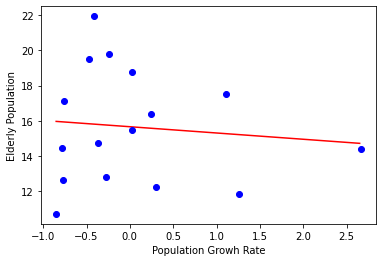

In [12]:
##최소제곱법으로 회귀선 구하기

X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

x_bar = sum(X)/len(X)
y_bar = sum(Y)/len(Y)

a = sum([(y-y_bar)*(x-x_bar) for y, x in list(zip(Y,X))])
a /= sum([(x-x_bar)**2 for x in X] )
b = y_bar - a*x_bar
print("a:", a, "b:", b)
line_x = np.arange(min(X), max(X), 0.01)
line_y = a*line_x + b

plt.plot(line_x, line_y, 'r-')

plt.plot(X,Y,'bo')
plt.xlabel("Population Growh Rate")
plt.ylabel("Elderly Population")
plt.show()

##회귀선을 통해 데이터의 경향성을 알 수 있습니다.
##X값이 증가할수록 Y값은 감소함을 알 수 있습니다. 즉, 음의 상관관계임을 알 수 있습니다.

0 a: 0.18972728 b: 0.19875245 loss: 248.62627
100 a: 0.13059218 b: 6.571724 loss: 92.35504
200 a: -0.111199364 b: 11.07707 loss: 30.820623
300 a: -0.2523882 b: 13.727177 loss: 13.543965
400 a: -0.31968808 b: 14.9906845 loss: 10.240279
500 a: -0.34545007 b: 15.474361 loss: 9.818724
600 a: -0.35339135 b: 15.623457 loss: 9.782902
700 a: -0.35536674 b: 15.660546 loss: 9.78088
800 a: -0.35576248 b: 15.66797 loss: 9.780806
900 a: -0.35582525 b: 15.669153 loss: 9.780804
1000 a: -0.35583317 b: 15.669302 loss: 9.780804


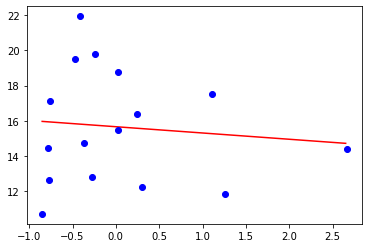

In [20]:
##최소제곱법을 쓰지 않고 텐서플로를 통해서도 구현할 수 있습니다.

import random

X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]


##랜덤 값으로 a, b값 설정
a = tf.Variable(random.random())
b = tf.Variable(random.random())


##잔차 제곱 평균 반환하는 함수
def compute_loss():
    y_pred = a*X+b
    loss = tf.reduce_mean((Y-y_pred)**2)
    return loss

#최적화 함수 정의
optimizer = tf.optimizers.Adam(lr=0.07)
for i in range(1001):
    optimizer.minimize(compute_loss, var_list=[a,b])
    
    if i%100==0:
        print(i, "a:", a.numpy(), "b:", b.numpy(), "loss:",compute_loss().numpy())

line_x = np.arange(min(X), max(X), 0.01)
line_y = a*line_x + b

plt.plot(line_x, line_y, 'r-')
plt.plot(X,Y, 'bo')
plt.show()


0 a: 0.13387954 b: 0.41208756 c: 0.7955661 loss: 227.6837
100 a: 3.9914968 b: -5.8910546 c: 6.6771164 loss: 65.99075
200 a: 2.7530742 b: -4.399044 c: 10.38996 loss: 30.808317
300 a: 1.2433205 b: -2.1808174 c: 12.984693 loss: 15.807794
400 a: 0.301563 b: -0.7964824 c: 14.604976 loss: 10.917141
500 a: -0.19942741 b: -0.060313594 c: 15.468817 loss: 9.71594
600 a: -0.4293487 b: 0.27751735 c: 15.865425 loss: 9.491768
700 a: -0.5207052 b: 0.41174808 c: 16.023026 loss: 9.459869
800 a: -0.55217934 b: 0.4579948 c: 16.077318 loss: 9.456413
900 a: -0.5615645 b: 0.47178343 c: 16.093513 loss: 9.456129
1000 a: -0.563982 b: 0.47533625 c: 16.097681 loss: 9.456111


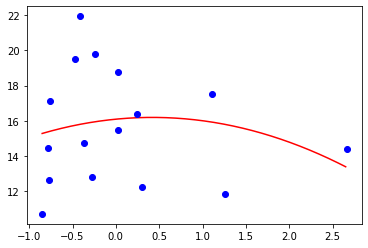

In [21]:
##이렇게 얻은 회귀선이 데이터를 잘 반영하고 있을지 의문이 생기게 됩니다. 보다 정확하게 데이터를 반영하기 위해
##다른 방법을 이용해 보도록 하겠습니다. 

##비선형 회귀는 선형회귀로는 표현할 수 없는 데이터의 경향성을 설명하기 위한 회귀입니다. 
#2차, 3차 등의 다항식을 이용한 회귀를 다항회귀라고 합니다.
##2차함수를 회귀선으로 써보도록 하겠습니다.

X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]


##랜덤 값으로 a, b값 설정
a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())


##잔차 제곱 평균 반환하는 함수
def compute_loss():
    y_pred = a*X*X+b*X+c
    loss = tf.reduce_mean((Y-y_pred)**2)
    return loss

#최적화 함수 정의
optimizer = tf.optimizers.Adam(lr=0.07)
for i in range(1001):
    optimizer.minimize(compute_loss, var_list=[a,b,c])
    
    if i%100==0:
        print(i, "a:", a.numpy(), "b:", b.numpy(), "c:", c.numpy(),"loss:",compute_loss().numpy())

line_x = np.arange(min(X), max(X), 0.01)
line_y = a*line_x*line_x + b*line_x + c

plt.plot(line_x, line_y, 'r-')
plt.plot(X,Y, 'bo')
plt.show()


In [22]:
##loss가 살짝 떨어진 것을 확인할 수 있습니다.
##항을 높여보면 오히려 loss가 높아지는 것을 확인할 수 있습니다.
##다항 회귀 뿐만 아니라, 지수, 로그 함수를 회귀선으로 사용하는 비선형 회귀를 사용할 수 있지만
##어떤 함수가 성능이 좋은지는 직접 해보면서 찾을 수밖에 없습니다.
##텐서플로에서는 딥러닝 네트워크를 통한 회귀를 지언하여 새로운 방법의 회귀 방법을 이용할 수 있습니다.

In [24]:
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 6, activation = "tanh", input_shape = (1,)),
    tf.keras.layers.Dense(units = 1)
])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1), loss="mse")
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 6)                 12        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [25]:
##tanh함수는 -1에서 1사이의 출력을 반환합니다. 
model.fit(X,Y, epochs=10)


Train on 16 samples
Epoch 1/10
16/16 [==============================] - 0s 27ms/sample - loss: 254.7214
Epoch 2/10
16/16 [==============================] - 0s 430us/sample - loss: 118.2935
Epoch 3/10
16/16 [==============================] - 0s 522us/sample - loss: 11.1343
Epoch 4/10
16/16 [==============================] - 0s 600us/sample - loss: 9.5904
Epoch 5/10
16/16 [==============================] - 0s 617us/sample - loss: 9.5529
Epoch 6/10
16/16 [==============================] - 0s 561us/sample - loss: 9.5410
Epoch 7/10
16/16 [==============================] - 0s 624us/sample - loss: 9.5292
Epoch 8/10
16/16 [==============================] - 0s 623us/sample - loss: 9.5169
Epoch 9/10
16/16 [==============================] - 0s 623us/sample - loss: 9.5040
Epoch 10/10
16/16 [==============================] - 0s 561us/sample - loss: 9.4904


In [26]:
model.predict(X)

array([[15.767771 ],
       [15.821693 ],
       [15.038233 ],
       [15.86817  ],
       [15.160753 ],
       [15.795963 ],
       [15.90292  ],
       [15.8885   ],
       [15.824499 ],
       [15.899124 ],
       [15.801065 ],
       [15.895626 ],
       [15.903126 ],
       [15.870588 ],
       [15.8272705],
       [14.2813225]], dtype=float32)

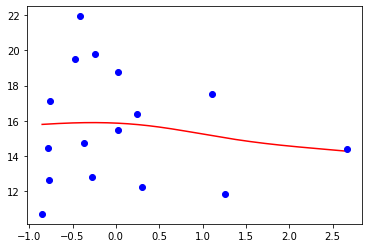

In [27]:
##학습이 잘 됐는지 확인하기 위해 그래프를 그려보도록 하겠습니다.

line_x = np.arange(min(X),max(X), 0.01)
line_y = model.predict(line_x)
plt.plot(line_x, line_y, 'r-')
plt.plot(X,Y, 'bo')
plt.show()

In [28]:
##다항회귀에서 구했던 2차함수와 비슷한 곡선이 나왔음을 확인할 수 있습니다. 
##이 방법을 이용해서 보스턴 주택 가격 데이터세트의 주택 가격을 회귀로 예측해보겠습니다.

In [32]:
from tensorflow.keras.datasets import boston_housing
(X_train, Y_train), (X_test, Y_test) = boston_housing.load_data()
type(X_train)

numpy.ndarray

In [33]:
##데이터는 훈련 셋, 검증 셋, 테스트 셋으로 분류해야 하며, 6:2:2비율로 나눕니다.(데이터 양에 따라 유동적으로 변화 가능)
##데이터의 단위가 다르므로 데이터를 전처리해야합니다.
##훈련 셋에 정규화를 통해 전처리를 하면, 테스트셋과 검증셋에 대해서도 훈련셋의 평균과 표준편차로 전처리 해줘야 합니다.

x_mean = X_train.mean(axis=0)
x_std = X_train.std(axis=0)
X_train -= x_mean
X_train /= x_std
X_test -= x_mean
X_test /= x_std

y_mean = Y_train.mean(axis=0)
y_std = Y_train.std(axis=0)
Y_train -= y_mean
Y_train /= y_std
Y_test -= y_mean
Y_test /= y_std

print(X_train[0])
print(Y_train[0])

[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]
-0.7821526033779157


In [34]:
##전처리 후, 딥러닝 네트워크를 학습시키겠습니다.

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(units=39, activation='relu'),
    tf.keras.layers.Dense(units=26, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer = tf.keras.optimizers.Adam(lr=0.07), loss='mse')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 52)                728       
_________________________________________________________________
dense_5 (Dense)              (None, 39)                2067      
_________________________________________________________________
dense_6 (Dense)              (None, 26)                1040      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 27        
Total params: 3,862
Trainable params: 3,862
Non-trainable params: 0
_________________________________________________________________


In [35]:
history = model.fit(X_train, Y_train, epochs=25, batch_size = 32, validation_split=0.25)   ### 훈련 데이터의 25%를 검증데이터로 사용


Train on 303 samples, validate on 101 samples
Epoch 1/25
303/303 [==============================] - 0s 2ms/sample - loss: 2.0507 - val_loss: 0.9480
Epoch 2/25
303/303 [==============================] - 0s 86us/sample - loss: 0.4777 - val_loss: 0.6463
Epoch 3/25
303/303 [==============================] - 0s 96us/sample - loss: 0.4008 - val_loss: 0.4909
Epoch 4/25
303/303 [==============================] - 0s 98us/sample - loss: 0.2681 - val_loss: 0.2218
Epoch 5/25
303/303 [==============================] - 0s 92us/sample - loss: 0.1950 - val_loss: 0.2891
Epoch 6/25
303/303 [==============================] - 0s 84us/sample - loss: 0.1723 - val_loss: 0.1779
Epoch 7/25
303/303 [==============================] - 0s 104us/sample - loss: 0.1568 - val_loss: 0.1592
Epoch 8/25
303/303 [==============================] - 0s 95us/sample - loss: 0.1533 - val_loss: 0.2162
Epoch 9/25
303/303 [==============================] - 0s 86us/sample - loss: 0.1563 - val_loss: 0.1391
Epoch 10/25
303/303 [======

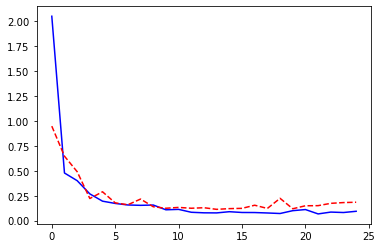

In [36]:
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.show()

In [38]:
##자세히 보시면 loss는 꾸준히 감소하지만 val_loss는 loss보다 크고, 증가하거나 유지하는 양상을 보입니다.
##검증 셋에 대한 정확도를 높일 필요가 보이지만 일단은 현 상태에서 테스트 셋을 통해 회귀 모델을 평가해보겠습니다.

model.evaluate(X_test, Y_test)

102/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.2806928601919436

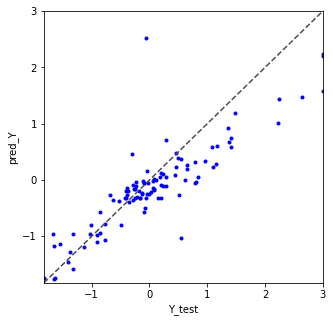

In [41]:
##얼마나 잘 예측했는지 확인하기 위해 실제 가격과 예측 가격을 1대1로 비교해보겠습니다.

pred_Y = model.predict(X_test)

plt.figure(figsize=(5,5))
plt.plot(Y_test, pred_Y, 'b.')
plt.axis([min(Y_test), max(Y_test), min(Y_test), max(Y_test)])

# y=x에 해당하는 대각선
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], ls="--", c=".3")
plt.xlabel('Y_test')
plt.ylabel('pred_Y')

plt.show()

In [56]:
##중간중간 직선에서 떨어진 점이 보입니다. 따라서 과적합이 일어나지 않도록 검증 셋에 대해서 정확도를 높인다면 
##테스트 셋에서도 정확도를 높일 수 있을 것입니다. 
##val_loss가 높아지지 않도록, 학습 도중에 끼어들어서 학습을 멈춰야합니다.
##이를 위해 callback 함수를 사용합니다. fit메서드 인자로 전달하면 됩니다.

history = model.fit(X_train, Y_train, epochs=25, batch_size=32, validation_split = 0.25, 
                   callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss')])


##val_loss가 3회동안 최고 기록을 갱신하지 못하면 학습을 멈추게 됩니다.

Train on 303 samples, validate on 101 samples
Epoch 1/25
303/303 [==============================] - 0s 99us/sample - loss: 0.1256 - val_loss: 0.2122
Epoch 2/25
303/303 [==============================] - 0s 95us/sample - loss: 0.1151 - val_loss: 0.2709
Epoch 3/25
303/303 [==============================] - 0s 89us/sample - loss: 0.1038 - val_loss: 0.1436
Epoch 4/25
303/303 [==============================] - 0s 89us/sample - loss: 0.0942 - val_loss: 0.1872
Epoch 5/25
303/303 [==============================] - 0s 92us/sample - loss: 0.1405 - val_loss: 0.1742
Epoch 6/25
303/303 [==============================] - 0s 82us/sample - loss: 0.1456 - val_loss: 0.1282
Epoch 7/25
303/303 [==============================] - 0s 86us/sample - loss: 0.0960 - val_loss: 0.1463
Epoch 8/25
303/303 [==============================] - 0s 105us/sample - loss: 0.1139 - val_loss: 0.1171
Epoch 9/25
303/303 [==============================] - 0s 76us/sample - loss: 0.0708 - val_loss: 0.1226
Epoch 10/25
303/303 [=====

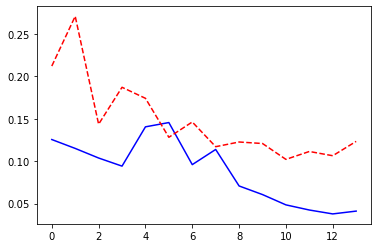

In [57]:
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.show()

In [58]:
model.evaluate(X_test, Y_test)

102/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.20112787362407236

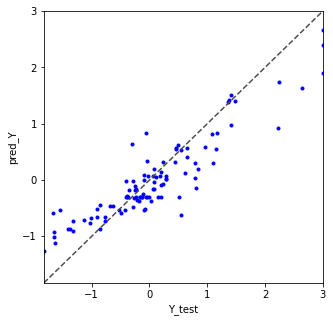

In [59]:
pred_Y = model.predict(X_test)

plt.figure(figsize=(5,5))
plt.plot(Y_test, pred_Y, 'b.')
plt.axis([min(Y_test), max(Y_test), min(Y_test), max(Y_test)])

# y=x에 해당하는 대각선
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], ls="--", c=".3")
plt.xlabel('Y_test')
plt.ylabel('pred_Y')

plt.show()

In [ ]:
##그래프를 보시면 앞선 그래프보다 직선에 더 가깝게 분포한 것을 확인할 수 있습니다.